### Required Libraries
The following libraries are required for this assignment:
<ol>
    <li>Numpy - Numerical python</li>
    <li>Scipy - Scientific python</li>
    <li>Matplotlib - Python 2D plotting library</li>
    <li>Seaborn - Visualization library based on matplotlib</li>
    <li>Pandas - Python data analysis library</li>
    <li>Scikit-learn - Python Machine learning library </li>
    <li>Keras - Deep learning library</li>
</ol>
</ol>

### Dataset
The dataset contains daily weather observations from numerous Australian weather stations.
The problem is to predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow
The target variable RainTomorrow means: Will it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. Read more about it here.

## Step 1: Importing data and exploring the features

### Step 1.1 
To start working, you will need to import the required libraries, and read the data into a pandas DataFrame.
- Import the following libraries using import statements.
<ul>
    <li>pandas (for data manipulation)</li>
    <li>numpy (for multidimensional array computation)</li>
    <li>seaborn and matplotlib.pyplot (both for data visualization)</li>
</ul>
- Read the csv file 'train.csv' using Pandas' read_csv function
(<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv</a>)

Note: Run a code cell by clicking on the cell and using the keyboard shortcut &lt;Shift&gt; + &lt;Enter&gt;.

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('weatherAUS.csv')

### Step 1.2
Use head function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html">pandas.DataFrame.head</a>) of pandas library to preview the first 10 data.

In [198]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


### Step 1.3
Evaluate the distribution of features using describe function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html">pandas.DataFrame.describe</a>) of the pandas library.

In [201]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### Step 1.4
Evaluate the distribution of categorical features using describe function.

In [202]:
data.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2016-06-06,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


### Step 1.5
Evaluate the data quality & perform missing values assessment using isnull function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html">pandas.isnull</a>) and sum function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html">pandas.DataFrame.sum</a>) of pandas library.

List the features with missing values.

In [203]:
missing = data.isnull().sum()
missing [ missing > 0] 

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

### Step 1.6

Let's explore the <strong>RainTomorrow</strong> feature


#### Step 1.6.1
We can check on the number of unique values by using the nunique function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html">pandas.DataFrame.nunique</a>) of pandas library.

In [204]:
data['RainTomorrow'].nunique()

2

#### Step 1.6.2
We can get the list of unique values by using the unique function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unique.html">pandas.DataFrame.unique</a>) of pandas library.

In [205]:
data['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

#### Step 1.6.3

To explore the <strong>RainTomorrow</strong> feature, evaluate its distribution using countplot function (<a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">seaborn.countplot</a>) of seaborn library.

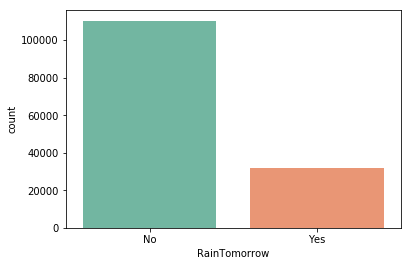

In [206]:
sns.countplot(x='RainTomorrow', data=data, palette='Set2')
plt.show()

### Step 1.7
Use select_dtypes function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html">pandas.DataFrame.select_dtypes</a>) of pandas library to 
get the features that are categorical.

In [207]:
categorical_features = data.select_dtypes(include = ["object"]).columns
print("# of categorical features : " + str(len(categorical_features)))
print(categorical_features)

# of categorical features : 7
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


### Step 1.8
Use select_dtypes function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html">pandas.DataFrame.select_dtypes</a>) of pandas library to 
get the features that are numerical (i.e. not categorical).

In [208]:
numerical_features = data.select_dtypes(exclude = ["object"]).columns
print("# of numerical features: " + str(len(numerical_features)))
print (numerical_features)

# of numerical features: 17
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')


## Step 2: Drop the feature, RISK_MM

As described in the dataset description, we will need to drop the feature, RISK_MM, using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html">pandas.DataFrame.drop</a> of the pandas library.

In [209]:
data.drop(['RISK_MM'], axis=1, inplace=True)

## Step 3: Transforming data

### Step 3.1 Processing the date feature

#### Step 3.1.1
Use the to_datetime() function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html">pandas.to_datetime()</a>) of the pandas library to convert the <strong>Date</strong> attribute to <a href="https://docs.python.org/3/library/datetime.html#datetime-objects">datetime</a> objects.

In [210]:
data['Date'] = pd.to_datetime(data['Date'])

#### Step 3.1.2
What is the data type of the converted date?

You can access the property dtypes (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html">pandas.DataFrame.dtypes</a>) of pandas library 

In [211]:
data['Date'].dtypes

dtype('<M8[ns]')

#### Step 3.1.3
Extract the <strong>year</strong>, <strong>month</strong>, <strong>day</strong> attributes of the <strong>datetime</strong> objects converted for the <strong>Date</strong> feature and create the corresponding new features <strong>Year</strong>, <strong>Month</strong> and <strong>Day</strong>.

In [212]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

#### Step 3.1.4
Drop the original <strong>Date</strong> feature.

In [213]:
data.drop('Date', axis=1, inplace=True)

Let's check the information of the resulted dataframe <strong>data</strong>.

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null obje

## Step 4: Preparing Training and Testing Datasets

### Step 4.1 
Prepare data - feature set and target set
- Build target set Y by extracting 'RainTomorrow' from data
- Build feature set X by excluding/dropping the 'RainTomorrow' from data

In [215]:
Y = data['RainTomorrow']
X = data
X = X.drop(['RainTomorrow'], axis=1)

### Step 4.2 
Split the data into training and testing datasets

Using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">sklearn.model_selection.train_test_split()</a> function to split the training data, feature set and target set (i.e. X and Y), into two subsets for training and validation, i.e. X_train, X_valid, Y_train, Y_valid.

<ul>
<li>Set test_size to 0.3. test_size is the proportion of the dataset to include in the test split. <li>Set random_state to 0. This integer value is the seed used by the random number generator.</li>
</ul>

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### Step 4.3
Using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">pandas.DataFrame.shape</a> function to view the dimensionality of the training and testing datasets of features and targets

In [217]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(Y_train.shape))
print("y_test : " + str(Y_test.shape))

X_train : (99535, 24)
X_test : (42658, 24)
y_train : (99535,)
y_test : (42658,)


## Step 5: Cleaning data: Handling missing values

### Step 5.1 Categorical features with missing values of the training dataset

#### Step 5.1.1

<span style="color:red">The below categorical features have missing values</span>

WindGustDir
WindDir9am
WindDir3pm
RainToday

#### Step 5.1.2
Use the most common value of the feature to impute the missing values. Again, fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of the pandas library can be used.

In [218]:
X_train['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
X_train['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
X_train['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
X_train['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Step 5.2 Numerical features with missing values of the training dataset

#### Step 5.2.1
<span style="color:red">The below numerical features have missing values</span>

<pre>MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustSpeed    132923 non-null float64
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
Year             142193 non-null int64
Month            142193 non-null int64
Day              142193 non-null int64</pre>

#### Step 5.2.2
Use mean / median to impute the missing values of the feature with the second least missing values. fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of pandas library can be used.

In [219]:
numerical_features = X_train.select_dtypes(exclude = ["object"]).columns
for col in numerical_features:
    col_median=X_train[col].median()
    X_train[col].fillna(col_median, inplace=True)  

c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Step 5.3 Handling missing values of the testing dataset

#### Step 5.3.1 Categorical features of the testing dataset
Use the most common value of the feature to impute the missing values. Again, fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of the pandas library can be used.

In [220]:
X_test['WindGustDir'].fillna(X_test['WindGustDir'].mode()[0], inplace=True)
X_test['WindDir9am'].fillna(X_test['WindDir9am'].mode()[0], inplace=True)
X_test['WindDir3pm'].fillna(X_test['WindDir3pm'].mode()[0], inplace=True)
X_test['RainToday'].fillna(X_test['RainToday'].mode()[0], inplace=True)

c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### Step 5.3.2 Numerical features of the testing dataset
Use mean / median to impute the missing values of the numerical features. fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of pandas library can be used.

In [221]:
numerical_features = X_test.select_dtypes(exclude = ["object"]).columns
for col in numerical_features:
    col_median=X_test[col].median()
    X_test[col].fillna(col_median, inplace=True)  

c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Step 6 Normailzation

### Step 6.1 Normalization of the training dataset

#### Step 6.1.1

We can get the skewness and kurtosis using 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html">pandas.DataFrame.skew</a>
and 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurt.html">pandas.DataFrame.kurt</a> functions.
<br />

Find the features which are with skewness values larger than 0.75, and print the features together with their skewness values

In [222]:
from scipy.stats import skew
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
skewed_feats = X_train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
print(skewed_feats)

Rainfall         10.032147
Evaporation       4.597064
WindGustSpeed     0.924118
WindSpeed9am      0.783634
dtype: float64


#### Step 6.1.2

Transform the feature Rainfall.

##### Step 6.1.2.1
Explore the distribution of Rainfall using <a href="https://seaborn.pydata.org/generated/seaborn.distplot.html">seaborn.displot</a> function.

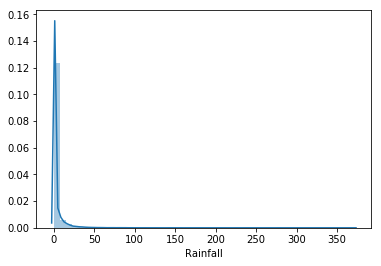

In [223]:
sns.distplot(X_train['Rainfall'])
plt.show()

##### Step 6.1.2.2

Apply log transformation to Rainfall using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html">numpy.log1p</a> function.

In [224]:
X_train['Rainfall'] = np.log1p(X_train['Rainfall'])

c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Step 6.1.2.3

Plot the distribution of Rainfall using seaborn.distplot function again.

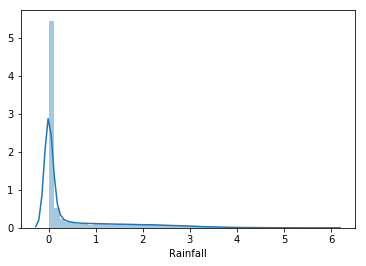

In [225]:
sns.distplot(X_train['Rainfall'])
plt.show()

#### Step 6.1.3

Transform the feature with the next highest skewness value.

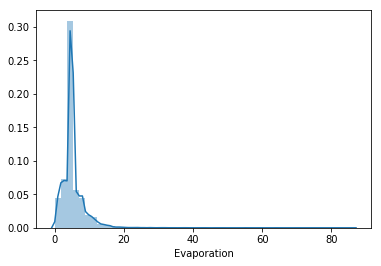

c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [226]:
sns.distplot(X_train['Evaporation'])
plt.show()

X_train['Evaporation'] = np.log1p(X_train['Evaporation'])

### Step 6.2 Normalization of the testing dataset

Perform similar normalization on the testing dataset

In [227]:
from scipy.stats import skew
numeric_feats = X_test.dtypes[X_test.dtypes != "object"].index
skewed_feats = X_test[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 1]
print(skewed_feats)

X_test['Rainfall'] = np.log1p(X_test['Rainfall'])
X_test['Evaporation'] = np.log1p(X_test['Evaporation'])

Rainfall       9.714932
Evaporation    6.351661
dtype: float64


c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## Step 7 Converting Categorial features

### Step 7.1 convert categorical features into dummy/indicator features of the training dataset

Convert the categorial features using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html">get_dummies</a> function of the pandas library.

In [228]:
X_train = pd.get_dummies(X_train)

Preview the first 10 rows of the training dataset using the head function

In [229]:
X_train.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
95444,13.0,21.0,2.708050,1.757858,6.0,31.0,6.0,17.0,89.0,70.0,...,0,0,0,0,1,0,0,0,0,1
27932,19.5,22.8,3.242592,1.757858,8.4,35.0,13.0,0.0,99.0,83.0,...,0,1,0,0,0,0,0,0,0,1
15097,21.0,33.4,0.000000,1.757858,8.4,39.0,4.0,19.0,26.0,17.0,...,0,0,0,0,0,0,0,0,1,0
94607,10.3,19.8,1.757858,1.335001,5.5,54.0,9.0,20.0,78.0,50.0,...,0,0,0,0,0,0,0,0,0,1
99888,15.5,25.3,0.182322,1.757858,8.4,31.0,4.0,20.0,80.0,77.0,...,0,0,0,0,1,0,0,0,1,0
18813,13.6,22.3,0.470004,1.757858,8.4,67.0,7.0,11.0,51.0,47.0,...,0,0,0,0,0,0,0,0,1,0
61149,9.9,26.6,0.000000,1.568616,12.9,43.0,13.0,20.0,55.0,41.0,...,0,0,0,0,0,0,0,0,1,0
88253,23.0,37.9,0.000000,1.757858,8.4,54.0,24.0,37.0,52.0,70.0,...,0,0,0,0,0,0,0,0,1,0
138427,19.8,31.3,0.000000,2.079442,11.1,46.0,28.0,30.0,64.0,44.0,...,0,0,0,0,0,0,0,0,1,0
33311,17.0,30.2,0.000000,1.435085,10.6,33.0,15.0,22.0,53.0,38.0,...,0,0,0,0,0,0,0,0,1,0


### Step 7.2 convert categorical features into dummy/indicator features of the testing dataset


#### Step 7.2.1
Convert the categorial features using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html">get_dummies</a> function of the pandas library.

In [230]:
X_test = pd.get_dummies(X_test)

#### Step 7.2.2

Align the testing dataset with the training dataset using the 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.align.html">pandas.DataFrame.align</a> function.

You may set the parameter join with the value 'left' and the parameter axis with the value 1.

In [231]:
final_train, X_test = X_train.align(X_test, join='left', axis=1)

Preview the first 10 rows of the testing dataset using the head function

In [232]:
X_test.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
86232,17.4,29.0,0.000000,1.526056,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,1,0
57576,6.8,14.4,0.587787,0.587787,8.5,46.0,17.0,22.0,80.0,55.0,...,1,0,0,0,0,0,0,0,1,0
124071,10.1,15.4,2.747271,1.757858,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,1,0,0,0,0,0,0,1
117955,14.4,33.4,0.000000,2.197225,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,1,0,0,0,1,0
133468,6.8,14.3,2.397895,0.182322,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,1
136631,19.3,29.9,0.000000,2.322388,11.0,43.0,26.0,17.0,44.0,37.0,...,0,0,0,0,0,0,0,0,1,0
75844,17.9,25.8,0.000000,2.451005,2.1,44.0,17.0,19.0,56.0,99.0,...,0,0,0,1,0,0,0,0,1,0
21853,13.8,20.1,0.000000,1.481605,6.2,65.0,19.0,15.0,62.0,81.0,...,0,0,0,0,0,0,1,0,1,0
19088,20.2,26.7,0.336472,1.757858,8.5,31.0,2.0,11.0,86.0,64.0,...,0,0,0,0,0,0,0,0,1,0
132305,8.5,20.2,0.000000,1.757858,8.5,33.0,6.0,20.0,70.0,47.0,...,0,0,0,0,0,0,0,0,1,0


Using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">pandas.DataFrame.shape</a> function to view the dimensionality of the training and testing datasets of features and targets

In [233]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(Y_train.shape))
print("y_test : " + str(Y_test.shape))

X_train : (99535, 118)
X_test : (42658, 118)
y_train : (99535,)
y_test : (42658,)


### Step 7.3


After aligning with the training data, some more features are now with missing values
We will need to handlethose missing values.

## Step 8: Training the Regression model using Sklearn

Using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">sklearn.linear_model.LogisticRegression</a> to build a linear gression model.

### Step 8.1 
Import the LinearRegression from sklearn.linear_model.

In [234]:
from sklearn.linear_model import LogisticRegression

### Step 8.2 
Build the logistic regression model by:
<ol>
<li>Initialize a Logistic Regression model by LogisticRegression() function.</li>
<li>Call fit() function to train the logistic regression model using the training feature data (i.e. X_train).</li>
<li>Predict the target values for the testing feature data (i.e. X_test) using the predict() function.
</ol>

In [235]:
# instantiate the model
LR = LogisticRegression()
#solver='liblinear', random_state=0)

# fit the model
LR.fit(X_train, Y_train)

LR_predictions = LR.predict(X_test)
LR_predictions

c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### Step 8.3
Evaluate the results using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">sklearn.metrics.accuracy_score</a> function of the sklearn library.

In [236]:
from sklearn.metrics import accuracy_score
print('Accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, LR_predictions)))

Accuracy score: 0.8396


## Step 9: Training the Neural Network model using Keras

### Step 9.1
Import the following libraries using import statements.
<ul>
    <li>keras (for deep learning) (Reference: <url>https://keras.io/</url>)
        <ul>
            <li>Sequential from keras.models</li>
            <li>Dense from keras.layers</li>
            <li>ModelCheckpoint from keras.callbacks</li>
        </ul>
    </li>    
</ul>
Note: Run a code cell by clicking on the cell and using the keyboard shortcut &lt;Shift&gt; + &lt;Enter&gt;.
<br />

In [237]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

### Step 9.2
- Build a neural network to learn from the given training set - trainData.
(Reference: <a href="https://faroit.github.io/keras-docs/1.0.1/getting-started/sequential-model-guide/">Here</a>)
<ol>
  <li>Initalizing a neural network using Sequential() function and name the returned object NN.</li>
  <li>Adding the input layer and the hidden layer using add function of NN and Dense function.</li>
  <li>Adding the output layer using add function of NN and Dense function.</li>
  <li>Prints a summary representation of our model by calling summary function of NN.</li>
</ol>

In [238]:
NN = Sequential()

NN.add(Dense(input_dim = X_train.shape[1], activation = 'relu', kernel_initializer = 'uniform', output_dim = 55))
NN.add(Dense(activation = 'relu', kernel_initializer = 'uniform', output_dim = 55))
NN.add(Dense(activation = 'sigmoid', kernel_initializer = 'uniform', output_dim = 1))
NN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 55)                6545      
_________________________________________________________________
dense_14 (Dense)             (None, 55)                3080      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 56        
Total params: 9,681
Trainable params: 9,681
Non-trainable params: 0
_________________________________________________________________


c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=55, activation="relu", input_dim=118)`
  del sys.path[0]
c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=55, activation="relu")`
  
c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=1, activation="sigmoid")`
  from ipykernel import kernelapp as app


### Step 9.3
- Compile the neural network and start training
<ol>
  <li>Call <a href="https://keras.io/models/sequential/#compile">compile()</a> function of NN to compile the neural network
            Parameters of compile function:
      <ul>
          <li>loss to 'binary_crossentropy': loss is a stochastic gradient decent depends on loss.</li>
          <li>optimizer to 'Adam': optimizer is the algorithm that we want to use to find optimal set of weights. For details about 'Adam', please visit <a href="https://arxiv.org/abs/1412.6980v8">here</a>.              
          </li>
          <li>metrics to ['accuracy']: metrics is the metric(s) that we want to use to improve the performance of our neural network. In our case, accuracy is the metrics.</li>
      </ul>

  </li>
  <li>Call <a href="https://keras.io/models/sequential/#fit">fit()</a> function of NN to train the model on training data</li>
</ol>

Note: You may need to convert the training target dataset Y_train from 'Yes'/'No' to 1/0 first. E.g.
<pre> Y_train_new = (Y_train == 'Yes')</pre>

In [1]:
y_train = (Y_train == 'Yes')

NN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

NN.fit(X_train, y_train)

NameError: name 'Y_train' is not defined

### Step 9.4 
Evaluate the model with Validation dataset

<ol>
<li>Evaluate the model with the validation data using the <a href="https://keras.io/models/sequential/#evaluate">evaluate()</a> function.
The evaluate function returns the loss value and metrics values for the model in test mode.
</ol>

Note: You may also need to convert the testing target dataset Y_test from 'Yes'/'No' to 1/0 first. 

In [240]:
y_test = (Y_test == 'Yes')

scores = NN.evaluate(X_test, y_test, verbose=0)
print (NN.metrics_names[1], scores[1])

acc 0.8429602888086642


## Step 10 -- Standardization and Rescaling

Rescaling and Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.
They might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

(Reference: <a href="https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling">here</a>)

Performs the rescaling on both the training and testing datasets:
<ol>
<li>Import the MinMaxScaler from sklearn.preprocessing module</li>
<li>Initializing a MinMaxScaler by using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">sklearn.preprocessing.MinMaxScaler</a> function, which transforms the numerical features by scaling each feature to a given range of [0, 1], i.e. between zero and one.</li>
<li>Compute the minimum and maximum to be used for later scaling by using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit">sklearn.preprocessing.MinMaxScaler.fit()</a> function.</li>
<li>Transform the data using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.transform">sklearn.preprocessing.MinMaxScaler.transform()</a> function.</li>
<li>The tranformed data is an numpy array. Convert it into a pandas.DataFrame using
pandas.DataFrame() function with pandas.DataFrame.columns.</li>
<li>Use the pandas.DataFrame.head() function to preview the data.</li>
</ol>

In [241]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

col_train = list(X_train.columns)
X_train_temp = scaler.transform(X_train)
X_train_minmax = pd.DataFrame(X_train_temp, columns = col_train)

X_test_temp = scaler.transform(X_test)
X_test_minmax = pd.DataFrame(X_test_temp, columns = col_train)

Review the first 10 rows of the training feature set using pandas.DataFrame.head().

In [242]:
X_train_minmax.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.503563,0.487713,0.457526,0.393415,0.413793,0.193798,0.046154,0.204819,0.89,0.70,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.657957,0.521739,0.547838,0.393415,0.579310,0.224806,0.100000,0.000000,0.99,0.83,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.693587,0.722117,0.000000,0.393415,0.579310,0.255814,0.030769,0.228916,0.26,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.439430,0.465028,0.296991,0.298778,0.379310,0.372093,0.069231,0.240964,0.78,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.562945,0.568998,0.030803,0.393415,0.579310,0.193798,0.030769,0.240964,0.80,0.77,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [243]:
X_test_minmax.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.608076,0.638941,0.000000,0.341537,0.765517,0.209302,0.084615,0.228916,0.63,0.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.356295,0.362949,0.099307,0.131549,0.586207,0.310078,0.130769,0.265060,0.80,0.55,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.434679,0.381853,0.464153,0.393415,0.586207,0.193798,0.100000,0.108434,0.70,0.61,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.536817,0.722117,0.000000,0.491747,0.800000,0.271318,0.069231,0.204819,0.40,0.23,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.356295,0.361059,0.405126,0.040804,0.503448,0.170543,0.115385,0.156627,0.92,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Step 11 -- Training the Regression model on the rescaled and standardized dataset  (5 points)

Re-train the regression model using the rescaled and standardized datasets from Step 10.

In [244]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
LR = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
LR.fit(X_train_minmax, Y_train)

LR_predictions = LR.predict(X_test_minmax)

from sklearn.metrics import accuracy_score
print('Accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, LR_predictions)))

Accuracy score: 0.8492


<span style="color:red">What is your observation of the resulted accuracy?</span> 

(Write your observation here.)

The accuracy is improved.

## Step 12: Explore K-fold cross validation

K-fold cross validation is often used to handle the situation of overfitting, i.e. a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

It is performed by splitting the training dataset into k subsets.
Then, models are trained by taking turns on all subsets except one which is held out, and the model performance is evaluated on the held out validation set.
The process is repeated until all subsets are given an opportunity to be the held out validation set. 
The performance measure is then averaged across the performance on all models.

Note: Cross validation is often not used for evaluating deep learning models because of the computational expense. 

Here is the reference on cross validation provided by scikit-learn:
    <url>https://scikit-learn.org/stable/modules/cross_validation.html</url>

### Step 12.1 
Explore and implement the use of 5-fold cross validation with logistic regression.<br />

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

LR = LogisticRegression(solver='liblinear', random_state=0)
scores = cross_val_score(LR, X_train, Y_train, cv=5)

print ("Avg accuracy =", scores.mean())

Avg accuracy = 0.8458230773094891


### Step 12.2
Explore and implement the use of 5-fold cross validation with Neural Network.<br />

In [248]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

kf = KFold(n_splits=5)
acc_scores = 0
for train_index, test_index in kf.split(X_train):
   X_train_new, X_test_new = X_train.iloc[train_index], X_train.iloc[test_index]
   Y_train_new, Y_test_new = Y_train.iloc[train_index], Y_train.iloc[test_index]

   NN = Sequential()

   NN.add(Dense(input_dim = X_train_new.shape[1], activation = 'relu', kernel_initializer = 'uniform', output_dim = 55))
   NN.add(Dense(activation = 'relu', kernel_initializer = 'uniform', output_dim = 55))
   NN.add(Dense(activation = 'sigmoid', kernel_initializer = 'uniform', output_dim = 1))
 
   y_train_new = (Y_train_new == 'Yes') 
   y_test_new = (Y_test_new == 'Yes') 
    
   NN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
   NN.fit(X_train_new, y_train_new)

   scores = NN.evaluate(X_test_new, y_test_new, verbose=0)
   acc_scores = acc_scores + scores[1]
   
print("Avg accuracy =", str(acc_scores/5))

c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=55, activation="relu", input_dim=118)`
c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=55, activation="relu")`
c:\users\kccec\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=1, activation="sigmoid")`


Epoch 1/1
79628/79628 [==============================] - 4s 56us/step - loss: 0.4050 - acc: 0.8253
Epoch 1/1
79628/79628 [==============================] - 5s 57us/step - loss: 0.4019 - acc: 0.8274
Epoch 1/1
79628/79628 [==============================] - 5s 62us/step - loss: 0.4066 - acc: 0.8244
Epoch 1/1
79628/79628 [==============================] - 5s 58us/step - loss: 0.4006 - acc: 0.8266
Epoch 1/1
79628/79628 [==============================] - 5s 58us/step - loss: 0.4057 - acc: 0.8242
Avg accuracy = 0.8373536946826585
